In [1]:
import pandas as pd
import numpy as np

#load the data
data = pd.read_excel('Tentative data.xlsx')

#clean the data
def clean_score(score):
    if pd.isnull(score):
        return None
    if isinstance(score, str) and ',' in score:
        score = score.split(',')[0]
    return pd.to_numeric(score, errors='coerce')

for column in data.columns[3:]:
    data[column] = data[column].apply(clean_score)

In [2]:
#split the dataset based on AI usage
tasks_without_ai = data[data['With AI'] == 'No'].iloc[:, 3:12]
tasks_with_ai = data[data['With AI'] == 'Yes'].iloc[:, 3:12]

#statistical analysis
stats_without_ai = tasks_without_ai.describe().transpose()
stats_with_ai = tasks_with_ai.describe().transpose()

print(stats_without_ai, '\n', stats_with_ai)


        count        mean         std    min     25%    50%     75%    max
Task 1   15.0  189.386667   79.965286   94.1  135.00  149.0  254.50  372.0
Task 2   15.0  130.460000   85.027002   12.0   76.40  112.0  159.50  282.0
Task 3   15.0  129.973333  105.366703   26.0   61.10   78.0  180.00  321.0
Task 4   15.0  245.620000  110.610554   87.0  165.00  224.0  336.50  419.0
Task 5   15.0  140.706667   57.078123    3.0  123.20  138.3  158.95  235.0
Task 6   15.0   93.640000  129.248563    4.0   41.00   54.0   95.50  545.0
Task 7   14.0  328.900000  186.021512  197.3  225.75  266.5  313.50  896.0
Task 8   10.0  409.580000  155.411410  234.0  256.50  427.4  505.30  686.0
Task 9    9.0  118.966667   87.785648    3.1   82.00  136.0  161.60  287.0 
         count        mean         std    min     25%    50%     75%    max
Task 1   15.0  137.160000   56.166853   69.0  106.80  113.8  142.50  285.0
Task 2   15.0   96.206667   75.674344    5.0   47.50   79.0  124.90  249.0
Task 3   15.0  119.6933

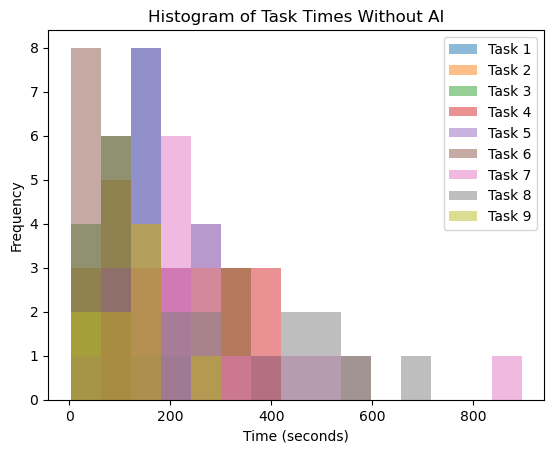

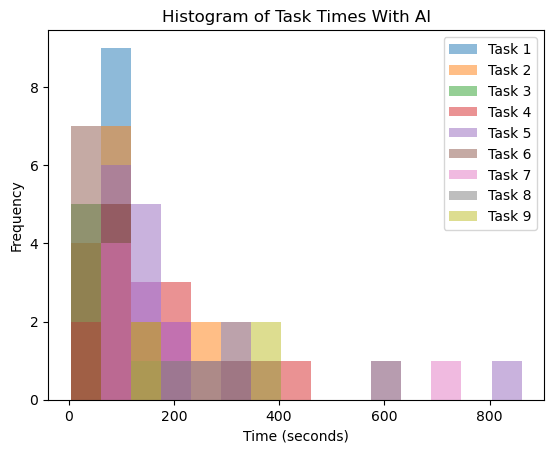

In [4]:
#histogram for task times without AI
tasks_without_ai.plot(kind='hist', bins=15, alpha=0.5, title='Histogram of Task Times Without AI')
plt.xlabel('Time (seconds)')
plt.show()

#histogram for task times with AI
tasks_with_ai.plot(kind='hist', bins=15, alpha=0.5, title='Histogram of Task Times With AI')
plt.xlabel('Time (seconds)')
plt.show()


In [5]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(tasks_without_ai['Task 1'].dropna(), tasks_with_ai['Task 1'].dropna())
print(f'T-Statistic: {t_stat}, P-value: {p_value}')


T-Statistic: 2.972598738706104, P-value: 0.010084416818026054


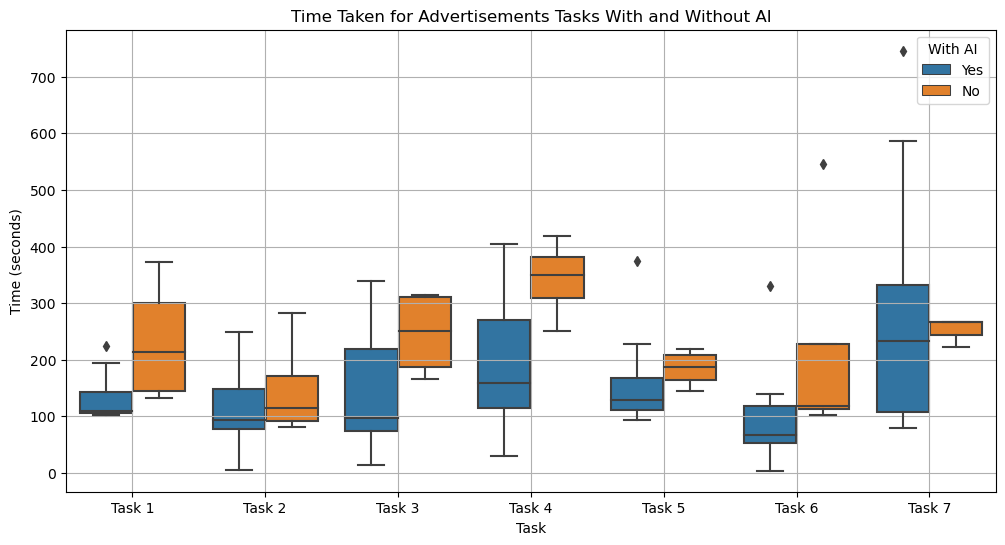

In [7]:
#generate boxplot for the advertisements set

import seaborn as sns
import matplotlib.pyplot as plt

#filter the data for the advertisements set
ads_data = data[data['Exam Set'] == 'Advertisements']

#long-format df
melted_ads_data = pd.melt(ads_data, id_vars=['With AI'], value_vars=[f'Task {i}' for i in range(1, 8)],
                           var_name='Task', value_name='Time')

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Task', y='Time', hue='With AI', data=melted_ads_data)
plt.title('Time Taken for Advertisements Tasks With and Without AI')
plt.ylabel('Time (seconds)')
plt.xlabel('Task')
plt.legend(title='With AI')
plt.grid(True)
plt.show()


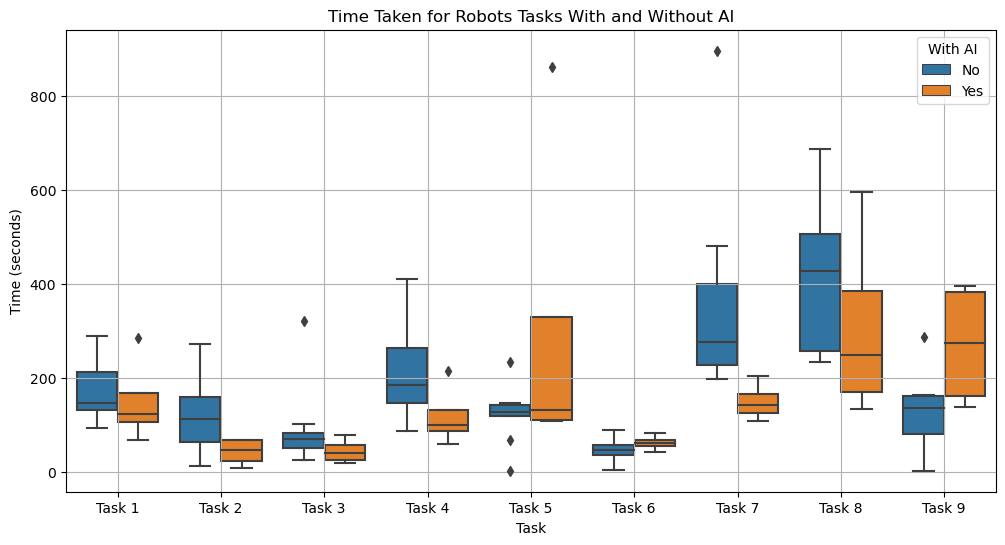

In [8]:
#boxplot
#filter the data for the robts set
robots_data = data[data['Exam Set'] == 'Robots']

#long-format df
melted_robots_data = pd.melt(robots_data, id_vars=['With AI'], value_vars=[f'Task {i}' for i in range(1, 10)],
                              var_name='Task', value_name='Time')

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Task', y='Time', hue='With AI', data=melted_robots_data)
plt.title('Time Taken for Robots Tasks With and Without AI')
plt.ylabel('Time (seconds)')
plt.xlabel('Task')
plt.legend(title='With AI')
plt.grid(True)
plt.show()